<a href="https://colab.research.google.com/github/SSUMINIs/mulcam34/blob/main/%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_240112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 회귀 분석

In [ ]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.1/9.8 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.8 MB 3.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.8 MB 4.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.8 MB 5.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.8 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 6.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.8 MB 6.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.8 MB 6.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.8 MB 6.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 5.0 MB/s eta 0:00:02
   ----------- -----------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.formula.api as smf
import seaborn as sns

statsmodels.__version__

'0.14.1'

In [ ]:
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [ ]:
model = smf.ols(formula = "sepal_length ~ sepal_width",data = iris).fit() #종속변수(y)~독립변수(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 12 Jan 2024   Prob (F-statistic):              0.152
Time:                        11:20:33   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5262      0.479     13.628      0.000       5.580       7.473
sepal_width    -0.2234      0.155     -1.440      0.152      -0.530       0.083
==============================================================================
Omnibus:                        4.389   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.237
Skew:                           0.360   Prob(JB):                        0.120
Kurtosis:                       2.600   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
intercept = model.params.Intercept #절편(상수항)
slope = model.params.sepal_width #기울기

print(intercept,slope)

6.526222550894485 -0.22336106112990056


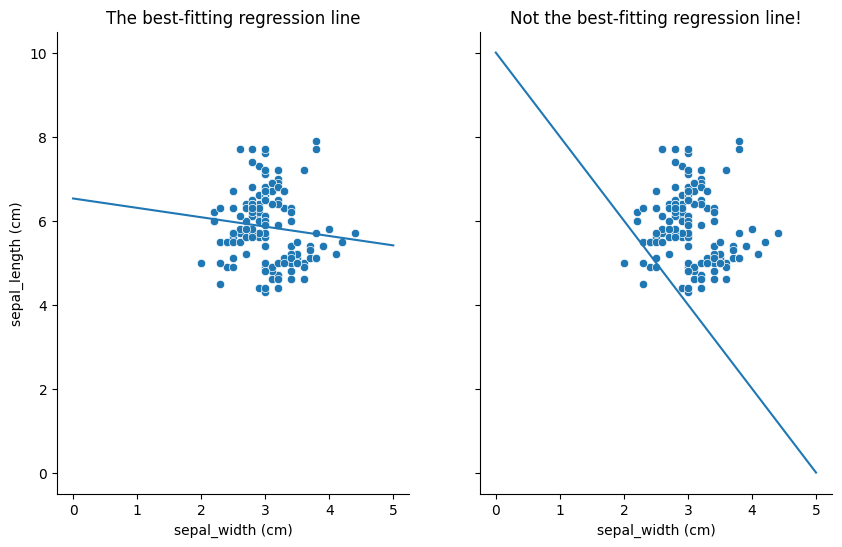

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
x = np.linspace(0,5)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("sepal_width (cm)")
fig.axes[0].set_ylabel("sepal_length (cm)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("sepal_width (cm)")
fig.axes[1].set_ylabel("sepal_length (cm)")
fig.axes[1].plot(x,-2*x+10)

sns.despine()
plt.show()

In [ ]:
!pip install pingouin

     ---------------------------------------- 0.0/198.6 kB ? eta -:--:--
     ----- ------------------------------- 30.7/198.6 kB 660.6 kB/s eta 0:00:01
     --------------------------- ---------- 143.4/198.6 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 198.6/198.6 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB 10.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/9.1 MB 7.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.1 MB 7.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/9.1 MB 7.9 

In [ ]:
import pingouin as pg

mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [ ]:
predictors = ['sepal_width', 'petal_length']
outcome = 'sepal_length'

mod2 = pg.linear_regression(iris[predictors], iris[outcome])
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.25,0.25,9.07,0.0,0.84,0.84,1.76,2.74
1,sepal_width,0.60,0.07,8.59,0.0,0.84,0.84,0.46,0.73
2,petal_length,0.47,0.02,27.57,0.0,0.84,0.84,0.44,0.51


#두개 독립 변수 모두 유의 둘중 뭐가 더 중요하나?
-> 상관계수를 보고 판단한다.(기울기로 판단 x)

In [ ]:
iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length']].rcorr()

C:\Users\USER\projectDS\my_env\Lib\site-packages\pingouin\correlation.py:1111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,sepal_length,sepal_width,petal_length
sepal_length,-,,***
sepal_width,-0.118,-,***
petal_length,0.872,-0.428,-


In [ ]:
mod3 = pg.linear_regression(iris['petal_length'], iris['sepal_length'])
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.31,0.08,54.94,0.0,0.76,0.76,4.15,4.46
1,petal_length,0.41,0.02,21.65,0.0,0.76,0.76,0.37,0.45


In [ ]:
mod4 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod4.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [ ]:
tips = sns.load_dataset("tips")


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
formula = "tip ~ sex + day + time +t otal_bill"
model = smf.ols(formula, data = tips).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.18e-32
Time:                        17:37:25   Log-Likelihood:                -350.52
No. Observations:                 244   AIC:                             707.0
Df Residuals:                     241   BIC:                             717.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9067      0.175      5.182      0.000       0.562       1.251
sex[T.Female]     0.0266      0.138      0.192      0.848      -0.246       0.299
total_bill        0.1052      0.007     14.110      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.499   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.652
Skew:                           0.447   Prob(JB):                     4.05e-09
Kurtosis:                       4.733   Cond. No.                         63.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""